In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
dataset = pd.read_csv('/Users/Lenovo/Desktop/movies_metadata.txt')

In [3]:
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
#Null values in the dataset
dataset.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

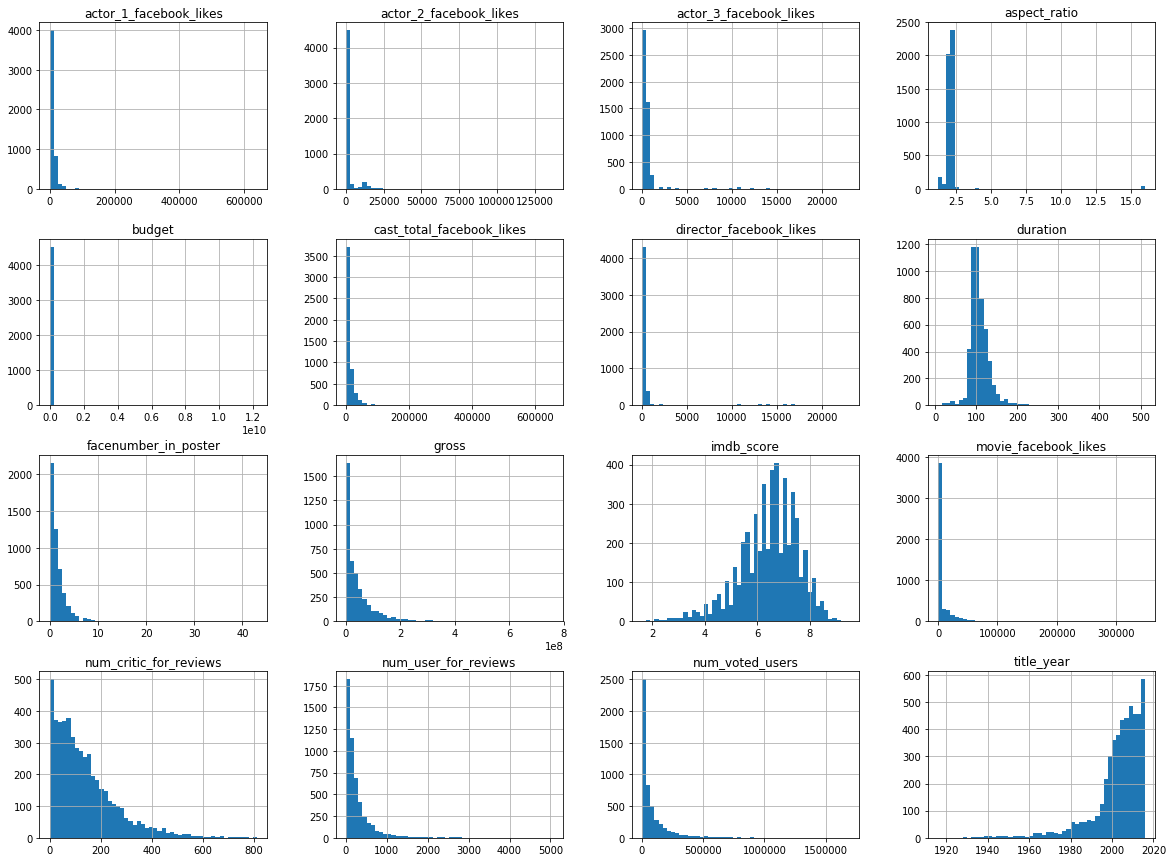

In [11]:
#frequency distribution plots of numerical features 
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

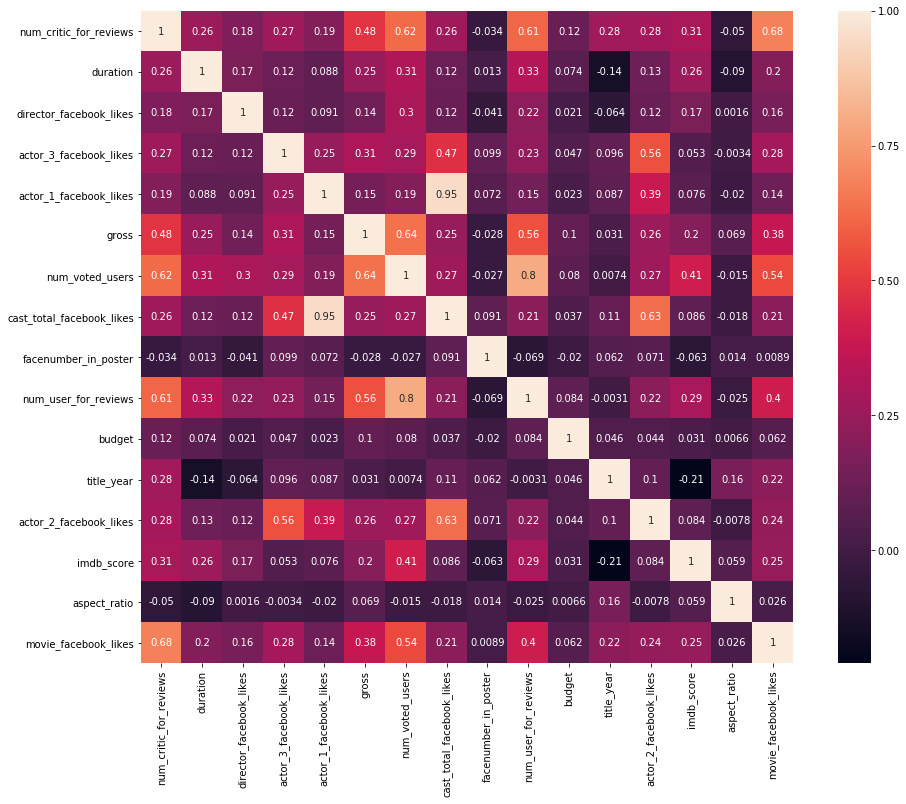

In [10]:
#Correlation numerical plot of all attributes  
import seaborn as sns
corrplot = dataset.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrplot, square=True, annot=True);

- The "imdb_score" has very small but positive correlation with the "director_facebook_likes", meaning a popular director does not necessarily mean his directed movie is great.
- The "imdb_score" has very small but positive correlation with the "actor_1_facebook_likes", meaning that an actor is popular in social network does not mean that a movie is high rating if he is the leading actor. So do supporting actors.
- The "imdb_score" has small but positive correlation with "duration". Long movies tend to have high rating.
- The "imdb_score" has small but negative correlation with "facenumber_in_poster". It is perhaps not a good idea to have many faces in movie poster if a movie wants to be great.
- The "imdb_score" has almost no correlation with "budget". Throwing money at a movie will not necessarily make it great.

In [26]:
category_features = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'country', 'content_rating', 'language']
number_features = ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'director_facebook_likes','cast_total_facebook_likes','budget', 'gross']
all_selected_features = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'country', 'content_rating', 'language', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'director_facebook_likes','cast_total_facebook_likes','budget', 'gross', 'genres', "imdb_score"]
eliminate_if_empty_list = ['actor_1_name', 'actor_2_name', 'director_name', 'country', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'director_facebook_likes','cast_total_facebook_likes', 'gross', "imdb_score"]

In [38]:
#Data Cleaning
def data_cleaning(path):
    read_data = pd.read_csv(path)
    select_data = read_data[all_selected_features]
    data = select_data.dropna(axis = 0, how = 'any', subset = eliminate_if_empty_list)
    data = data.reset_index(drop = True)
    for x in category_features:
        data[x] = data[x].fillna('None').astype('category')
    for y in number_features:
        data[y] = data[y].fillna(0.0).astype(np.float)
    return data

In [40]:
path = '/Users/Lenovo/Desktop/movies_metadata.txt'
dataset = data_cleaning(path)

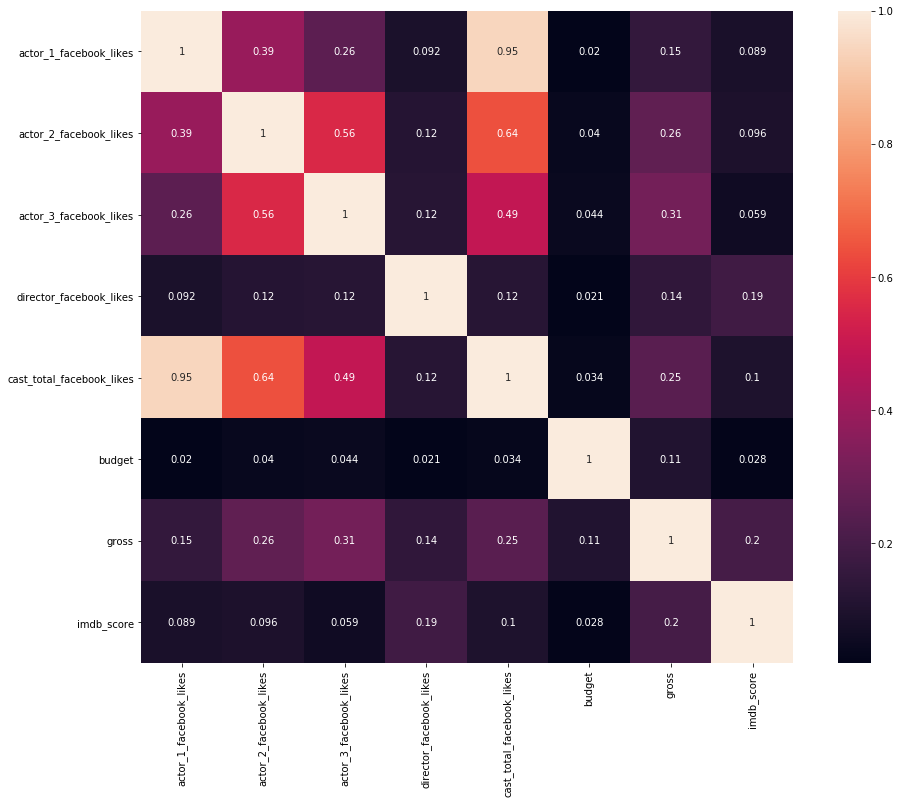

In [41]:
#Correlation plot of selected Variables 
corrplot = dataset.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrplot, square=True, annot=True);

In [55]:
#Preprocessing Categorical Variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def preprocessing_categorical(data):
    label_encoder = LabelEncoder()
    label_encoded_data = label_encoder.fit_transform(data) 
    label_binarizer = preprocessing.LabelBinarizer()
    label_binarized_data = label_binarizer.fit_transform(label_encoded_data) 
    return label_binarized_data

def preprocessing_category(data):
    data_c=0
    for i in range(len(category_features)):
        new_data = data[category_features[i]]
        new_data_c = preprocessing_categorical(new_data)
        if i == 0:
            data_c=new_data_c
        else:
            data_c = np.append(data_c, new_data_c, 1)
    return data_c

In [56]:
#Scaling of Numerical Variables
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

def preprocessing_numerical_minmax(data):
    global min_max_scaler
    scaled_data = min_max_scaler.fit_transform(data)
    return scaled_data

In [57]:
#Preprocessing of Numerical Variables 
def preprocessing_numerical(data):
    data_list_numerical = list(zip(data['director_facebook_likes'], data['actor_1_facebook_likes'], 
                                   data['actor_2_facebook_likes'], data['actor_3_facebook_likes'], 
                                   data['cast_total_facebook_likes'], data['budget']))

    data_numerical = np.array(data_list_numerical)
    data_numerical = preprocessing_numerical_minmax(data_numerical)
    return data_numerical


In [58]:
#Data Aggregating 
def preprocessed_agregated_data(database): 
    numerical_data = preprocessing_numerical(database)
    categorical_data = preprocessing_category(database)
    all_data = np.append(numerical_data, categorical_data, 1)
    return all_data

In [85]:
#Defining the feature set and the target set 
database = dataset.drop('imdb_score', 1)
preprocessed_data = preprocessed_agregated_data(database)
target_imdb_score = dataset['imdb_score']
target_imdb = np.array(target_imdb_score).reshape(-1,1)
target_imdb = preprocessing_numerical_minmax(target_imdb)

In [87]:
#Spliting the dataset into training and test sets 
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data,target_imdb, test_size=0.3)


In [74]:
def regression_with_cross_validation(model, data, target, n_fold, model_name, pred_type):
    print(pred_type, " (Regression Model: ", model_name)
    cross_val_score_mean_abs_err  = cross_val_score(model, data, target, scoring = 'mean_absolute_error', cv = n_fold) 
    print("\nCross Validation Score (Mean Absolute Error)        : \n", -cross_val_score_mean_abs_err)
    print("\nCross Validation Score (Mean Absolute Error) (Mean) : \n", -cross_val_score_mean_abs_err.mean())
    cross_val_score_mean_sqr_err  = cross_val_score(model, data, target, scoring = 'mean_squared_error', cv = n_fold)  
    print("\nCross Validation Score (Mean Squared Error)         : \n", -cross_val_score_mean_sqr_err)
    print("\nCross Validation Score (Mean Squared Error)  (Mean) : \n", -cross_val_score_mean_sqr_err.mean())

In [80]:
#Random Forest model 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

randomForestRegressorModel = RandomForestRegressor()
regression_with_cross_validation(randomForestRegressorModel, preprocessed_data, target_imdb.ravel(), 5, "Random Forest Regression", "(IMDB Score Prediction)")

(IMDB Score Prediction)  (Regression Model:  Random Forest Regression


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anac


Cross Validation Score (Mean Absolute Error)        : 
 [0.09224847 0.08694883 0.09558285 0.09228759 0.09874511]

Cross Validation Score (Mean Absolute Error) (Mean) : 
 0.09316257236739163


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



Cross Validation Score (Mean Squared Error)         : 
 [0.01411751 0.01305518 0.01620702 0.01604425 0.01655281]

Cross Validation Score (Mean Squared Error)  (Mean) : 
 0.01519535304313899


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [81]:
#Decision tree model
from sklearn import tree

DecisionTreeRegressorModel = tree.DecisionTreeRegressor()
regression_with_cross_validation(DecisionTreeRegressorModel, preprocessed_data, target_imdb.ravel(), 5, "Decision Tree Regression", "(IMDB Score Prediction)")

(IMDB Score Prediction)  (Regression Model:  Decision Tree Regression


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anac


Cross Validation Score (Mean Absolute Error)        : 
 [0.12408074 0.1106869  0.11207949 0.11431701 0.11290878]

Cross Validation Score (Mean Absolute Error) (Mean) : 
 0.11481458300735407


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



Cross Validation Score (Mean Squared Error)         : 
 [0.02418051 0.0212844  0.02214661 0.02352618 0.02311977]

Cross Validation Score (Mean Squared Error)  (Mean) : 
 0.02285149367922017


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [95]:
#Keras Sequential Model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold


In [96]:
def make_model(optimizer='adam', hidden_size=32,dropout_rate=0.0):
    model = Sequential([
        Dense(hidden_size, input_dim = 8905),
        Dropout(dropout_rate),
        Activation('relu'),
        Dense(hidden_size),
        Activation('relu'),
        Dense(hidden_size),
        Activation('relu'),
        Dense(1),
        Activation('softmax')
    ])
        
    model.compile(optimizer=optimizer, loss = 'mean_squared_error', metrics=['accuracy'])
    return model

In [ ]:
estimator = KerasRegressor(build_fn=make_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("KerasRegressionModel: %.2f (%.2f) MSE" % (results.mean(), results.std()))

We used 3 models to predict the imdb ratings of a movie:
- RandomForest
- DecisionTree
- Keras Sequential

We found that the overall trainig error was lower with RandomForest Model. We can use the GridSearchCV to get the best parameters for each model and optimize the result. We split the dataset into training and testing to get the error ratings of the train and test model but due to system and time constraints I used cross validation on the entire set. We could compare the training and testing errors to determine if the model is overfitting or underfitting and subsequently lower or increase the model complexity to get a better sense of data available.

Insights:
- Budget is important, although there is no strong correlation between budget and movie rating.
- The facebook popularity of director is an important factor to affect a movie rating.
- The facebook popularity of the top 3 actors/actresses is important.